Load the trained gan model and visualise the generated images

In [1]:
# example of loading the generator model and generating images
from numpy import zeros
from numpy import ones
import numpy as np
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf

from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

#### Import data from google co-lab ###
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)




Mounted at /content/gdrive


4/4 [==============================] - 1s 111ms/step


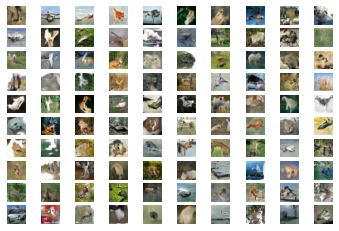

In [7]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# create and save a plot of generated images
def save_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis("off")
        # plot raw pixel data
        plt.imshow(examples[i, :, :])
    filename = r'/content/gdrive/MyDrive/Colab Notebooks/plots/generator_model_v1_250.png'

    #plt.show()
    plt.savefig(filename, dpi=300)

# load model
model = load_model(r"/content/gdrive/MyDrive/Colab Notebooks/GAN_model/generator_model_v1_250.h5")
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)